In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing #Loading the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target

In [3]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [4]:
df['MEDV']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MEDV, Length: 20640, dtype: float64

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [7]:
X = df.drop("MEDV",axis=1)   
y = df["MEDV"] 

In [8]:
# We do this to prevent the overfitting part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [9]:
X_train.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.120396,0.358747,-0.059383,0.006284,0.002043,-0.085176,-0.010093
HouseAge,-0.120396,1.000000,-0.162349,-0.077218,-0.299736,0.013631,0.020830,-0.117501
AveRooms,0.358747,-0.162349,1.000000,0.825325,-0.068784,0.005120,0.105380,-0.025010
AveBedrms,-0.059383,-0.077218,0.825325,1.000000,-0.060845,-0.002736,0.068443,0.013283
Population,0.006284,-0.299736,-0.068784,-0.060845,1.000000,0.074734,-0.117704,0.108161
AveOccup,0.002043,0.013631,0.005120,-0.002736,0.074734,1.000000,-0.003676,0.012906
Latitude,-0.085176,0.020830,0.105380,0.068443,-0.117704,-0.003676,1.000000,-0.925158
Longitude,-0.010093,-0.117501,-0.025010,0.013283,0.108161,0.012906,-0.925158,1.000000


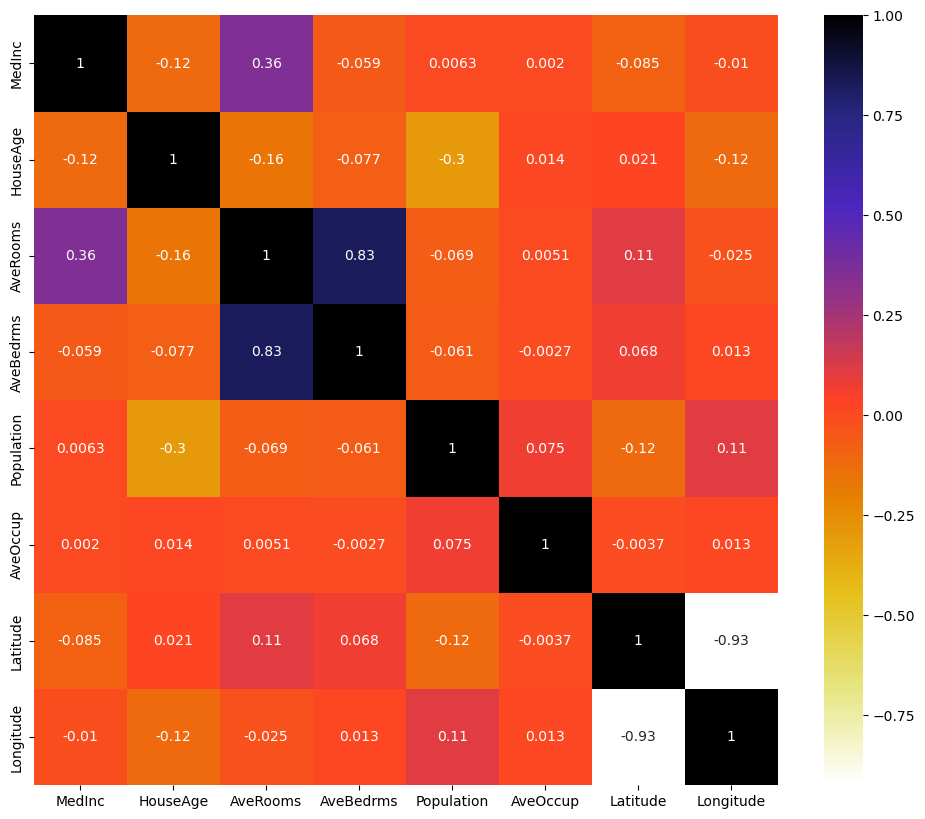

In [10]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [11]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                # we use abs() to consider -ve correlated value , it is not prefered all the times as it may effect confusion matrix
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X_train, 0.7) #Threshold is set to 70%
len(set(corr_features))

2

In [13]:
corr_features # we get the correlated data here

{'AveBedrms', 'Longitude'}

In [14]:
# we are deleting the correlated columns on both X_train & X_test data
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude
14740,4.1518,22.0,5.663073,1551.0,4.180593,32.58
10101,5.7796,32.0,6.107226,1296.0,3.020979,33.92
20566,4.3487,29.0,5.930712,1554.0,2.910112,38.65
2670,2.4511,37.0,4.992958,390.0,2.746479,33.20
15709,5.0049,25.0,4.319261,649.0,1.712401,37.79
...,...,...,...,...,...,...
19681,3.0962,36.0,4.746421,1168.0,2.388548,39.15
12156,4.1386,2.0,8.821216,2826.0,3.368296,33.66
10211,7.8750,30.0,7.550926,523.0,2.421296,33.89
2445,2.0658,34.0,5.938144,363.0,3.742268,36.56


In [15]:
### Huge Data Set

In [16]:
df=pd.read_csv('santander.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

<AxesSubplot:>

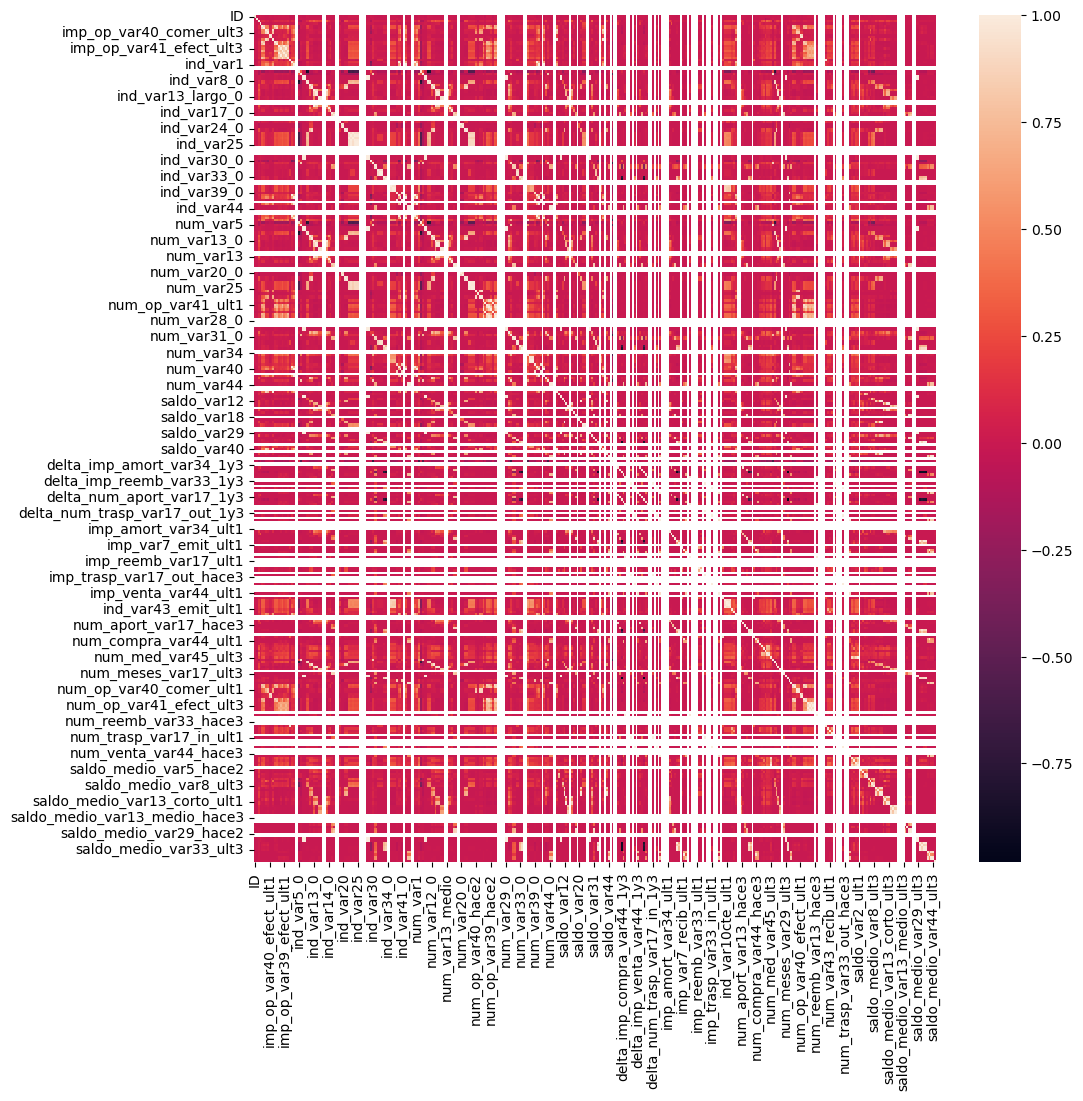

In [17]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [18]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

156

In [19]:
corr_features

{'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10cte_ult1',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_largo',
 'ind_var20',
 'ind_var24',
 'ind_var25',
 'ind_var25_0',
 'ind_var26',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var29',
 'ind_var29_0',
 'ind_var31',
 'ind_var32',
 'ind_var32_0',
 'ind_var37',
 'ind_var37_0',
 'ind_var39',
 'ind_var40',
 'ind_var40_0',
 'ind_var41_0',
 'ind_var44',
 'ind_var6',
 'ind_var8',
 'ind_var9_cte_ult1',
 'ind_var9_ult1',
 'num_aport_

In [20]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
9394,18882,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,75170.310000
898,1778,2,79,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,57855.510000
2398,4806,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117310.979016
5906,11854,2,48,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,50659.230000
2343,4697,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,43843.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,8026,2,28,0.0,237.45,237.45,0.0,0.0,0,237.45,...,0,0,0,0,0.0,0.0,0.0,0,0.0,103622.310000
7375,14795,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,51898.800000
9307,18726,2,25,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,99251.790000
8394,16923,2,50,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117310.979016
